<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/A5-univariate-rnn-forecasting/univariate_time_series_multi_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Load Dataset

In [12]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [13]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

In [14]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

## Forecasting Several Steps Ahead

If we want to predict the next 10 values, instead of just 1, we can modify our previous model to predict the next 10 values. We first need to load the dataset that has sequences with 9 more time steps.

In [22]:
n_steps = 50
series = load('/content/drive/MyDrive/Colab Notebooks/CS581-TestResults/assignment5/HW5-supp-files/univariate-time-series-multi-step.npy')

X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [23]:
#Improve upon this model with your own model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.0835
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0686 - val_loss: 0.0602
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0547 - val_loss: 0.0508
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0478 - val_loss: 0.0452
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0436 - val_loss: 0.0418
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0407 - val_loss: 0.0392
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0386 - val_loss: 0.0371
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0370 - val_loss: 0.0357
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0359 - val_loss: 0.0346
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0350 - val_loss: 0.0338

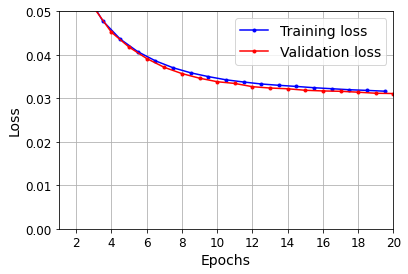

In [24]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

Now let's predict the next 10 values:

In [25]:
series = load('/content/drive/MyDrive/Colab Notebooks/CS581-TestResults/assignment5/HW5-supp-files/univariate-time-series-multi-step-test.npy')
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

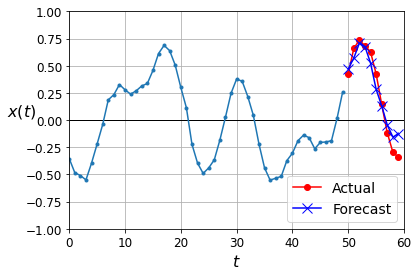

In [26]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [21]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0325


0.03254472836852074

## RNN Model

In [36]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,X_new.shape,Y_new.shape

((7000, 50, 1), (1000, 50, 1), (7000, 10), (1000, 10), (1, 50, 1), (1, 10, 1))

In [38]:
rnnmodel = keras.models.Sequential([
    keras.layers.LSTM(256,input_shape=[50,1]),
    keras.layers.Dense(100),
    keras.layers.Dense(10)
])
rnnmodel.compile(loss="mse", optimizer="adam")
print(rnnmodel.summary())
rnnmodel.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=20, batch_size=128)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 290,902
Trainable params: 290,902
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
55/55 [==============================] - 20s 355ms/step - loss: 0.0820 - val_loss: 0.0559
Epoch 2/20
55/55 [==============================] - 19s 347ms/step - loss: 0.0500 - val_loss: 0.0439
Epoch 3/20
55/55 [==============================] - 20s 358ms/step - loss: 0.0407 - val_loss: 0.0368
Epoch 4/20
55/55 [==============================] - 19s 345ms/step - l

In [40]:
scores = rnnmodel.evaluate(X_test,Y_test)
print(f"RMSE: {scores*100}")

32/32 [==============================] - 1s 42ms/step - loss: 0.0115
RMSE: 1.1500442400574684


In [42]:
Y1 = rnnmodel(X_valid)

In [43]:
Y1.shape

TensorShape([2000, 10])